In [31]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

alamat = "https://pokemondb.net/pokedex/all"
safeAdd = Request(alamat, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(safeAdd)
data = BeautifulSoup(html, 'html.parser')

# print(data)

# judul = data.findAll("h2")

table = data.find("table",{"class" : "data-table block-wide"})
rows = table.findAll("tr",limit=985)

hasil = []
for row in rows:
    info = []
    for cell in row.findAll(["td","th"]):
        info.append(cell.get_text().strip())
    hasil.append(info)



# print(hasil)
df = pd.DataFrame(hasil[1:],columns = hasil[0])
df.set_index('#', inplace=True)
# df['part 2'][0] = None
# df['Distance (ly)'][0] = '0.000015813'
# df['Spectral class'][0] = 'G2 V'




In [32]:
df

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
003,Venusaur,Grass Poison,525,80,82,83,100,100,80
003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
004,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...
847,Barraskewda,Water,490,61,123,60,60,50,136
848,Toxel,Electric Poison,242,40,38,35,54,35,40
849,Toxtricity Low Key Form,Electric Poison,502,75,98,70,114,70,75


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 001 to 850
Data columns (total 9 columns):
Name       984 non-null object
Type       984 non-null object
Total      984 non-null object
HP         984 non-null object
Attack     984 non-null object
Defense    984 non-null object
Sp. Atk    984 non-null object
Sp. Def    984 non-null object
Speed      984 non-null object
dtypes: object(9)
memory usage: 76.9+ KB


In [47]:
df_x = df.iloc[:, 4:6]
df_x.head()

,Attack,Defense
#,,
001,49,49
002,62,63
003,82,83
003,100,123
004,52,43


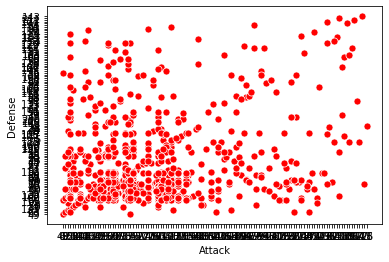

In [62]:
# fig, ax = sns.scatterplot(figsize=(15,10))
sns.scatterplot(x="Attack", y="Defense", data=df, s=50, color="red", alpha = 1)

In [63]:
import numpy as np
dfx_array = np.array(df_x)
print(dfx_array)

[['49' '49']
 ['62' '63']
 ['82' '83']
 ...
 ['98' '70']
 ['98' '70']
 ['65' '45']]


In [70]:
import matplotlib.pyplot as pltfrom 
from sklearn.cluster import KMeans
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 3, random_state=123)
# Menentukan kluster dari data
kmeans.fit(dfx_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [71]:
print(kmeans.cluster_centers_)

[[ 58.20075047  56.26829268]
 [115.16423358  78.47080292]
 [ 89.51977401 121.03954802]]


In [72]:
# Menampilkan hasil kluster
print(kmeans.labels_)
# Menambahkan kolom "kluster" dalam data frame ritel
df["kluster"] = kmeans.labels_
df.head()

[0 0 1 2 0 0 1 1 1 0 0 2 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 2 2 2 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 2 2 2 2 2 2 0 0 1 1 0 0 2 2 1 0 0 0
 1 0 1 0 0 0 0 1 1 2 2 0 0 0 0 2 0 0 1 1 0 0 0 1 1 0 2 2 1 1 0 2 2 2 2 2 0
 2 1 1 0 2 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 2 2 1 1 1 1 2
 1 1 0 0 1 1 1 1 2 0 0 2 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 2 0 2 2 2 0 1 1 1 2 2
 1 1 1 0 1 0 2 0 1 0 2 0 1 0 0 2 0 0 1 1 0 2 2 1 0 0 1 0 0 0 2 0 1 1 2 0 0
 1 2 2 1 2 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 2 0 0 0 2 1 2 2 2 2 2 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 2 0 0 0 1 0 1 0 1 0 0 2 1 1 0 1 0 0 0 1 0
 2 0 2 1 1 0 0 0 0 0 0 1 0 1 1 0 2 0 0 1 1 0 0 0 1 0 0 2 0 2 2 2 0 0 2 1 2
 0 2 2 2 2 0 2 2 2 1 1 1 1 2 2 1 1 2 1 1 2 1 0 1 2 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 2 2 0 0 

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,kluster
#,,,,,,,,,,
001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,0
002,Ivysaur,Grass Poison,405,60,62,63,80,80,60,0
003,Venusaur,Grass Poison,525,80,82,83,100,100,80,1
003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,2
004,Charmander,Fire,309,39,52,43,60,50,65,0


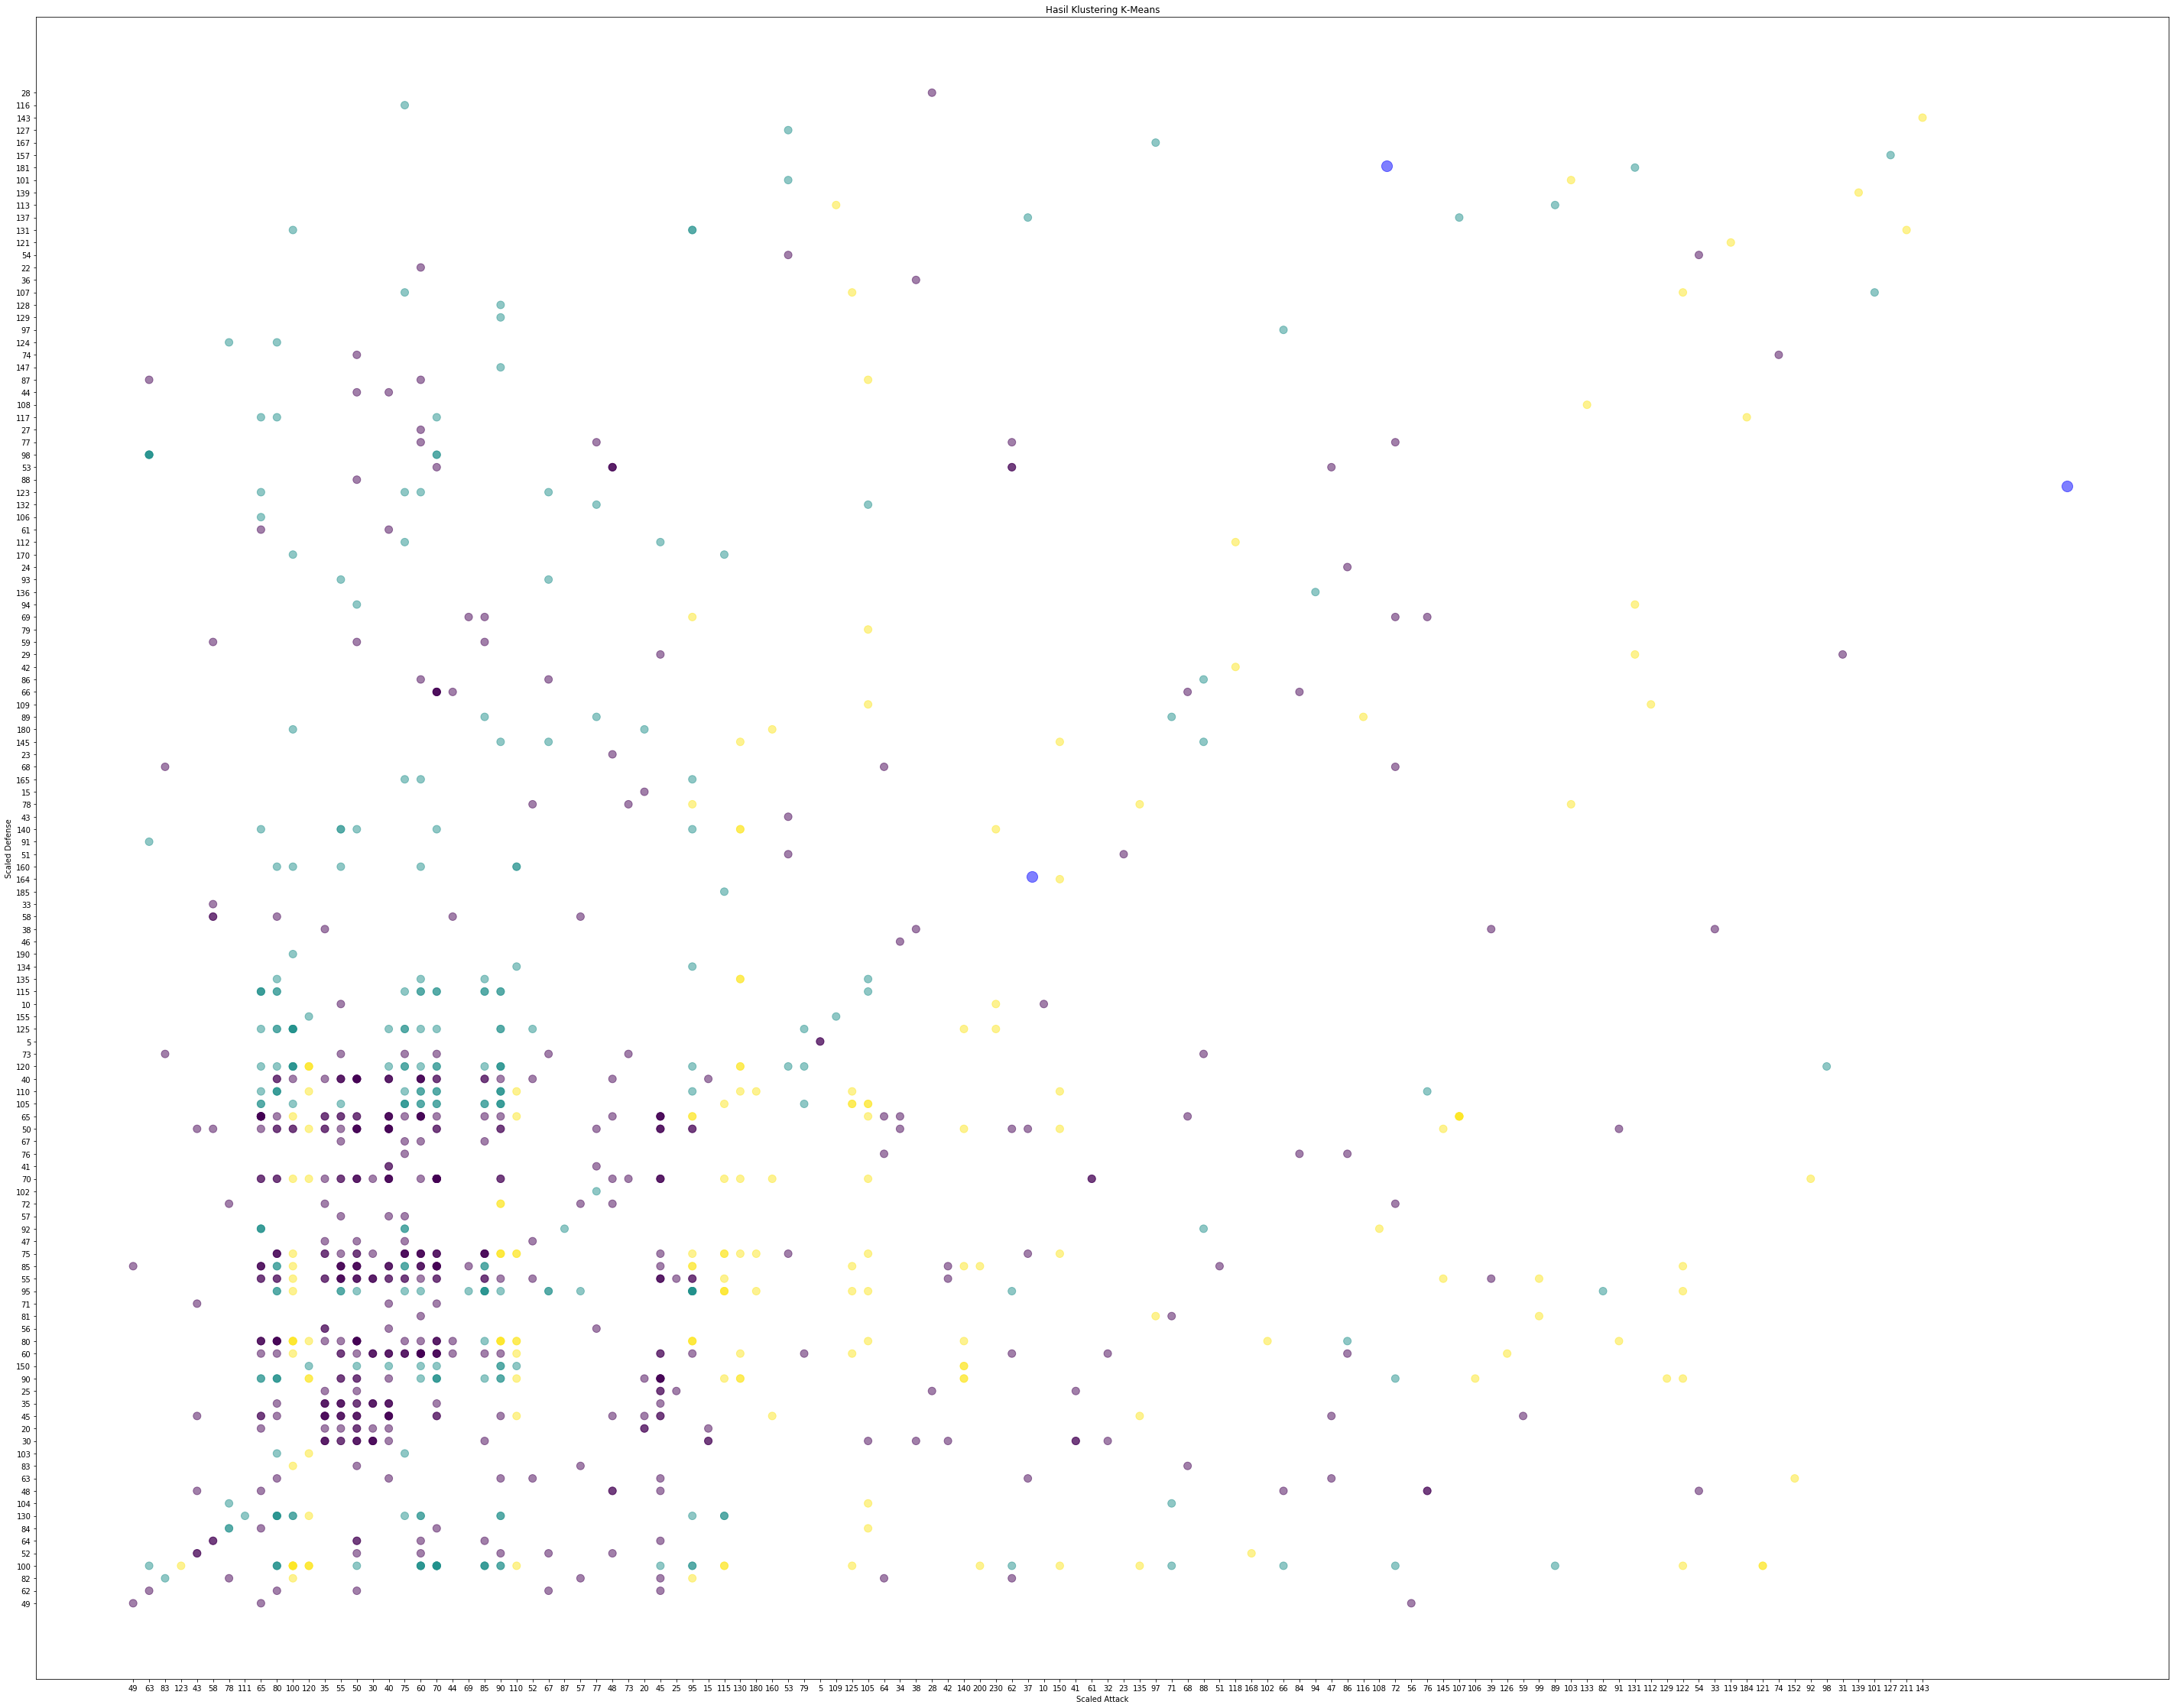

In [79]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50,40))
sct = ax.scatter(dfx_array[:,1], dfx_array[:,0], s = 100,
c = df.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s=200, alpha=0.5)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Attack")
plt.ylabel("Scaled Defense")
plt.show()

In [ ]:
#penganalisaan data atau metode Data Mining yang melakukan proses pemodelan tanpa supervisi 
#(unsupervised) dan merupakan salah satu metode yang melakukan pengelompokan data dengan sistem partisi.